In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Análise sobre a Sindrome Metabólica: 
Nesse dataset contém informações sobre indivíduos com a Síndrome Metabólica, que é uma condição médica associada a um conjunto de fatores de risco para doenças cardiovasculares e diabétes do tipo 2. 

### Descrição das colunas: 
 * seqn: Número de Identificação sequencial.
 * Idade: Idade do indivíduo.
 * Sexo: Gênero do indivíduo, aqui utilizado M para masculino e F para feminino. 
 * Conjugal: Estado civil do indivíduo. 
 * Renda: Nível de renda, ou informações relacionadas a rendas. 
 * Raça: Origem étnica ou racial de cada indivíduo. 
 * CinturaCirc: Medição da circufência da cintura, em cm. 
 * IMC: Índice de Massa Corporal. 
 * Albuminúria: Medição de albumina na urina. 
 * UrAlbCr: Relação de albumina/creatina urinária. 
 * UricAcid: Níveis de ácido úrico no sangue.
 * Glicose no sangue: Níveis de glicose no sangue, um indicador de risco de diabetes.
 * HDL: Níveis de colesterol de lipoproteína de alta densidade (o colesterol “bom”).
* Triglicerídeos: Níveis de triglicerídeos no sangue.
* Síndrome Metabólica: Variável binária que indica (1) presença ou (0) ausência de síndrome metabólica.

In [20]:
df_original = pd.read_csv('Metabolic_Syndrome.csv')
df_original

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,71901,48,Female,Married,1000.0,Other,NaN,59.7,0,22.11,5.8,152,57,107,0
2397,71904,30,Female,Single,2000.0,Asian,NaN,18.0,0,2.90,7.9,91,90,91,0
2398,71909,28,Male,Single,800.0,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84,0
2399,71911,27,Male,Married,8200.0,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124,1


In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


In [4]:
#traduzir de inglês para português: 
dict_tradutor = {
    'seqn': 'seqn',
    'Age' : 'Idade', 
    'Sex' : 'Sexo', 
    'Marital' : 'Conjugual', 
    'Income' : 'Renda', 
    'Race' : 'Raça', 
    'WaistCirc' : 'CircCintura',
    'BMI' : 'IMC',
    'Albuminuria' : 'Albuminúria', 
    'UrAlbCr' : 'UrAlbCr',
    'UricAcid' : 'AcidUric',
    'BloodGlucose' : 'GlicoseSangue',
    'HDL' : 'HDL',
    'Triglycerides' : 'Triglicerídeos',
    'MetabolicSyndrome' : 'SindromeMetabólica' # 1 tem a presença, 0 não tem a presença. 
    
}

colunas_portugues = []

for chave, valor in dict_tradutor.items():
    colunas_portugues.append(valor)

colunas_portugues

['seqn',
 'Idade',
 'Sexo',
 'Conjugual',
 'Renda',
 'Raça',
 'CircCintura',
 'IMC',
 'Albuminúria',
 'UrAlbCr',
 'AcidUric',
 'GlicoseSangue',
 'HDL',
 'Triglicerídeos',
 'SindromeMetabólica']

In [5]:
df = df_original

In [6]:
df.columns = colunas_portugues

In [7]:
df.head(4)

,seqn,Idade,Sexo,Conjugual,Renda,Raça,CircCintura,IMC,Albuminúria,UrAlbCr,AcidUric,GlicoseSangue,HDL,Triglicerídeos,SindromeMetabólica
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   seqn                2401 non-null   int64  
 1   Idade               2401 non-null   int64  
 2   Sexo                2401 non-null   object 
 3   Conjugual           2193 non-null   object 
 4   Renda               2284 non-null   float64
 5   Raça                2401 non-null   object 
 6   CircCintura         2316 non-null   float64
 7   IMC                 2375 non-null   float64
 8   Albuminúria         2401 non-null   int64  
 9   UrAlbCr             2401 non-null   float64
 10  AcidUric            2401 non-null   float64
 11  GlicoseSangue       2401 non-null   int64  
 12  HDL                 2401 non-null   int64  
 13  Triglicerídeos      2401 non-null   int64  
 14  SindromeMetabólica  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+

In [9]:
df.isnull().sum()

seqn                    0
Idade                   0
Sexo                    0
Conjugual             208
Renda                 117
Raça                    0
CircCintura            85
IMC                    26
Albuminúria             0
UrAlbCr                 0
AcidUric                0
GlicoseSangue           0
HDL                     0
Triglicerídeos          0
SindromeMetabólica      0
dtype: int64

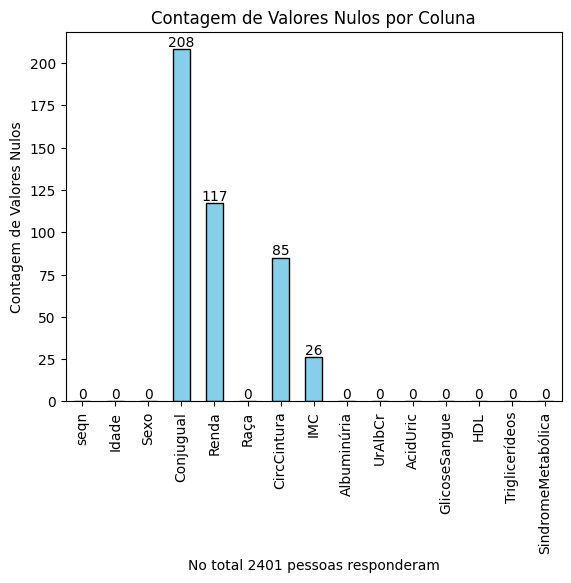

In [10]:
#Contagem de valores nulos, em gráfico
ax1 = df.isnull().sum().plot(kind='bar', color='skyblue', edgecolor='black' )
plt.title('Contagem de Valores Nulos por Coluna')
plt.xlabel('No total 2401 pessoas responderam')
plt.ylabel('Contagem de Valores Nulos') 

for i, value in enumerate(df.isnull().sum()):
    plt.annotate(str(value), xy=(i, value), ha='center', va='bottom')

plt.show()

/var/folders/gf/lsq9hnm95pz3qsglh7wjfls80000gn/T/ipykernel_49637/1940488426.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, contagem_sexo[i], contagem_sexo[i], ha='center', va='bottom')


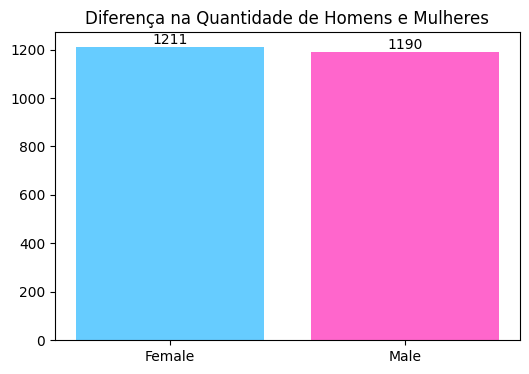

In [11]:
#Contagem de homens e mulheres
contagem_sexo = df['Sexo'].value_counts()
plt.figure(figsize=(6, 4))

plt.bar(contagem_sexo.index, contagem_sexo.values, color=['#66CCFF', '#FF66CC'])

plt.title("Diferença na Quantidade de Homens e Mulheres")

for i in range(len(contagem_sexo)):
    plt.text(i, contagem_sexo[i], contagem_sexo[i], ha='center', va='bottom')


plt.show()

In [12]:
contagem_SM = df['SindromeMetabólica'].value_counts()
contagem_SM

SindromeMetabólica
0    1579
1     822
Name: count, dtype: int64

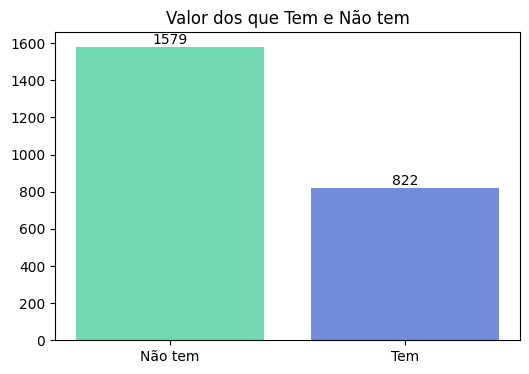

In [13]:
#Quem tem e quem não tem a SM: 
contagem_SM = df['SindromeMetabólica'].value_counts()
plt.figure(figsize=(6, 4))

plt.bar(contagem_SM.index, contagem_SM.values, color=['#71D8B2', '#718CD8'])

plt.title("Valor dos que Tem e Não tem")

plt.xticks(contagem_SM.index, ['Não tem', 'Tem'])

for i in range(len(contagem_sexo)):
    plt.text(i, contagem_SM[i], contagem_SM[i], ha='center', va='bottom')


plt.show()

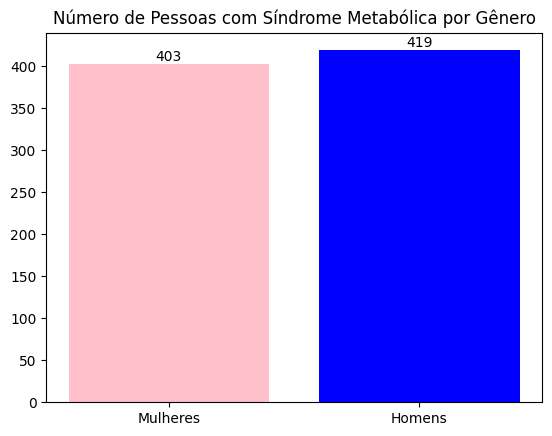

In [14]:
#Quantidade de homens e mulheres que tem a SM, em gráfico:
mulheres_com_SM = df[(df['Sexo'] == 'Female') & (df['SindromeMetabólica'] == 1)]
homens_com_SM = df[(df['Sexo'] == 'Male') & (df['SindromeMetabólica'] == 1)]

contagem_mulheres = mulheres_com_SM.shape[0]
contagem_homens = homens_com_SM.shape[0]

categorias = ['Mulheres', 'Homens']
contagens = [contagem_mulheres, contagem_homens]

plt.bar(categorias, contagens, color=['pink', 'blue'])


for i in range(len(categorias)):
    plt.text(i, contagens[i], contagens[i], ha='center', va='bottom')


plt.title("Número de Pessoas com Síndrome Metabólica por Gênero")

plt.show()

In [15]:
renda_max = df['Renda'].max()
renda_min = df['Renda'].min()

print(f"Renda Máxima: {renda_max}, Renda Mínima: {renda_min}")

Renda Máxima: 9000.0, Renda Mínima: 300.0


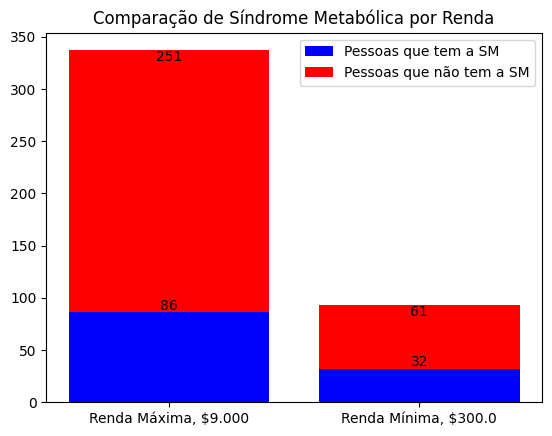

In [16]:
pessoas_renda_max = df[df['Renda'] == 9000.0]
pessoas_renda_min = df[df['Renda'] == 300.0]

pessoas_renda_max_1 = pessoas_renda_max[pessoas_renda_max['SindromeMetabólica'] == 1]
pessoas_renda_max_0 = pessoas_renda_max[pessoas_renda_max['SindromeMetabólica'] == 0]

pessoas_renda_min_1 = pessoas_renda_min[pessoas_renda_min['SindromeMetabólica'] == 1]
pessoas_renda_min_0 = pessoas_renda_min[pessoas_renda_min['SindromeMetabólica'] == 0]

contagem_max_1 = len(pessoas_renda_max_1)
contagem_max_0 = len(pessoas_renda_max_0)
contagem_min_1 = len(pessoas_renda_min_1)
contagem_min_0 = len(pessoas_renda_min_0)


categorias = ['Renda Máxima, $9.000', 'Renda Mínima, $300.0']
sindrome_metabolica_1 = [contagem_max_1, contagem_min_1]
sindrome_metabolica_0 = [contagem_max_0, contagem_min_0]

plt.bar(categorias, sindrome_metabolica_1, label='SíndromeMetabólica=1', color='blue')
plt.bar(categorias, sindrome_metabolica_0, label='SíndromeMetabólica=0', bottom=sindrome_metabolica_1, color='red')


for i in range(len(categorias)):
    plt.text(i, sindrome_metabolica_1[i], sindrome_metabolica_1[i], ha='center', va='bottom')
    plt.text(i, sindrome_metabolica_1[i] + sindrome_metabolica_0[i], sindrome_metabolica_0[i], ha='center', va='top')

plt.title("Comparação de Síndrome Metabólica por Renda")

plt.legend(['Pessoas que tem a SM', 'Pessoas que não tem a SM'])

plt.show()


In [17]:
maior_imc = df['IMC'].max()
menor_imc = df['IMC'].min()

print(f"Maior IMC: {maior_imc}, Menor IMC: {menor_imc}")

Maior IMC: 68.7, Menor IMC: 13.4


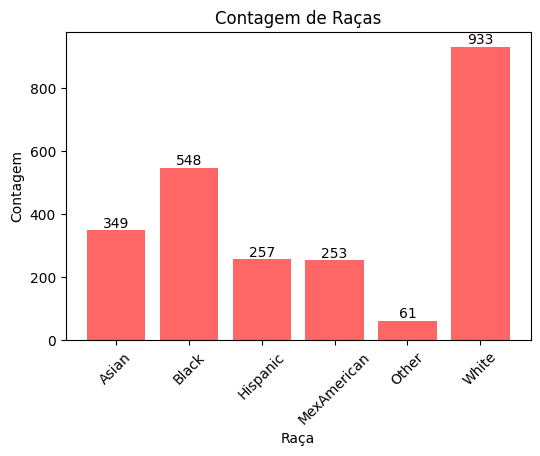

In [18]:
#Contagem de raças.
contagem_racas = df.groupby('Raça').size().reset_index(name='Contagem')
plt.figure(figsize=(6, 4))

plt.bar(contagem_racas['Raça'], contagem_racas['Contagem'], color='#FF6666')

for i, value in enumerate(contagem_racas['Contagem']):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.title('Contagem de Raças')
plt.xlabel('Raça')
plt.ylabel('Contagem')
plt.xticks(rotation=45)  


plt.show()

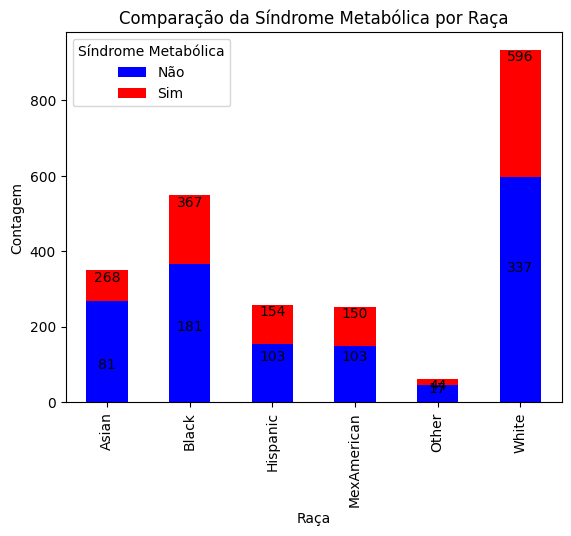

In [19]:

agrupado = df.groupby(['Raça', 'SindromeMetabólica']).size().unstack()

ax2 = agrupado.plot(kind='bar', stacked=True, color=['blue', 'red'])

for i in range(len(agrupado)):
    plt.text(i, agrupado.iloc[i, 1], agrupado.iloc[i, 1], ha='center', va='bottom')
    plt.text(i, agrupado.iloc[i, 0] + agrupado.iloc[i, 1], agrupado.iloc[i, 0], ha='center', va='top')

plt.xlabel('Raça')
plt.ylabel('Contagem')
plt.title('Comparação da Síndrome Metabólica por Raça')

plt.legend(title='Síndrome Metabólica', labels=['Não', 'Sim'])
plt.show()
